In [110]:
from prevelop import preparation, exploration, clustering, evaluation

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

__Data Preparation and Preprocessing__

In [112]:
# file = '/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/csvfolding-2025-04-08_12-21-53.csv'

In [113]:
file = 'c:/Users/IM-KI/Documents/PrEvelOp_Docs/Export_classmate/csvfolding-2025-04-08_12-21-53.csv'

In [114]:
### load cad-data
cad_data, num_columns_cad, cat_columns_cad = preparation.load_simus_data(file)

In [115]:
cad_data

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_Einzeleindrehung,Innenform_ungleichmäßiger Einstich Ebenen beidseitig,Innenform_beidseitig steigend,Innenform_Sackloch gesenkt,Innenform_RND_004,Innenform_Radialanordnung,Innenform_Rotationsteilmantelfläche,Innenform_Spitze,Innenform_RND_003,Innenform_Rotationsteilstufenfläche
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3064-__04-001-020-20,19990.52,64.0,64.0,20.0,64.0,0.0,20.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3095-1512-128-128-AP,190554.17,128.0,94.6,94.6,94.6,50.0,128.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3095-1521-072-036-AO,81610.72,94.6,94.6,36.0,94.6,50.0,36.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3095-1521-072-072-AO,163915.64,94.6,94.6,72.0,94.6,50.0,72.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3095-1521-088-044-AO,99900.70,94.6,94.6,44.0,94.6,50.0,44.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z139-__22-228-228-MF,943571.16,227.5,139.1,139.1,139.1,76.0,227.5,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Z139-__26-405-163-MA,873581.77,162.5,139.1,139.1,139.1,76.0,162.5,1.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Z139-__26-905-163-MA,864868.83,162.5,139.1,139.1,139.1,76.0,162.5,1.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# # load the data
# process_data = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/Projektmappe Arbeitspläne.xlsx')
# link_data = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/Projektmappe Teile-Zeichnungen.xlsx')

In [117]:
# load the data
process_data = preparation.load_data('c:/Users/IM-KI/Documents/PrEvelOp_Daten_CAPicard_2/Projektmappe Arbeitspläne.xlsx')
link_data = preparation.load_data('c:/Users/IM-KI/Documents/PrEvelOp_Daten_CAPicard_2/Projektmappe Teile-Zeichnungen.xlsx')

In [118]:
# drop rows with NaN in colum 'Teil'
link_data = link_data.dropna(subset=['Teil'])
# drop rows with NaN in colum 'Teil'
process_data = process_data.dropna(subset=['Teil'])

In [126]:
# load zeichnungen data 
zeichnungen = preparation.load_data('c:/Users/IM-KI/Documents/PrEvelOp_Docs/capicard_zeichnungen.xlsx')
# remove rows from link_data where 'Zeichnung' does not appear in zeichnungen
link_data = link_data[link_data['Zeichnung'].isin(zeichnungen['Zeichnung'])]
# remove duplicates from link_data
link_data = link_data.drop_duplicates(subset=['Zeichnung'])
link_data

,Teil,Zeichnung
71451,4160-7121-240-240-ID,4160-__21-240-240-ID
73078,8120-1531-180-180-00,8120-__31-180-180-00
73080,8120-1532-180-180-01,8120-__32-180-180-01
76920,G062-0521-060-060-24,G062-__21-060-060-24
76922,G062-0521-060-020-24,G062-__21-060-020-24
...,...,...
159234,P022-7104-001-033-P1,P022-__04-001-033-P1
159357,9058-25XX-XXX-050-HF,9058-__XX-XXX-050-HF
159615,7050-2504-009-013-24,7050-__04-009-013-24
159624,7095-XA52-125-125-KC,7095-__52-125-125-KC


In [120]:
# aggreagate process data
process_data, num_columns_process, cat_columns_process = preparation.aggregate_data(process_data, key='Teil', columns=['Aktivität','Basisressource','Produktionsmenge'], methods=['encode','encode','mean'])

In [127]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
num_columns = num_columns_cad + num_columns_process
cat_columns = cat_columns_cad + cat_columns_process
data, data_preprocessed = preparation.prepare_data(cad_data, num_columns, cat_columns, process_data=process_data, link_data=link_data)

In [128]:
# remove columns in data and data_preprocessed containing the substring 'nan'
data = data.loc[:, ~data.columns.str.contains('nan')]
data_preprocessed = data_preprocessed.loc[:, ~data_preprocessed.columns.str.contains('nan')]
# remove columns in data and data_preprocessed containing the substring 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('Unnamed')]
data_preprocessed = data_preprocessed.loc[:, ~data_preprocessed.columns.str.contains('Unnamed')]
# drop columns in data and data_preprocessed where more than 95% of the values are 0
data = data.loc[:, (data != 0).mean() > 0.05]
data_preprocessed = data_preprocessed.loc[:, (data_preprocessed != 0).mean() > 0.05]
# drop columns in data and data_preprocessed where more than 95% of the values are 1
data = data.loc[:, (data != 1).mean() > 0.05]
data_preprocessed = data_preprocessed.loc[:, (data_preprocessed != 1).mean() > 0.05]

In [129]:
data

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Endenwinkel rechts,...,Basisressource 625000.0,Basisressource 530001.0,Basisressource 601000.0,Basisressource 611000.0,Basisressource 651000.0,Basisressource 651001.0,Basisressource 653000.0,Basisressource 655000.0,Basisressource 655001.0,Produktionsmenge
Teil,,,,,,,,,,,,,,,,,,,,,
4017-4300-001-005-HM,459.11,17.10,17.10,5.0,17.1,13.1,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,4.000000
4018-4304-001-001-LE,129.06,18.40,18.40,1.0,18.4,13.2,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1.000000
4018-7121-020-015-12,1285.78,17.80,17.80,15.0,17.8,8.5,15.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,16.000000
4026-1537-405-018-LE,4283.83,25.25,24.93,18.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2.000000
4027-1521-016-016-LE,3780.47,27.00,27.00,16.0,27.0,0.0,16.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,7.547170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X093-1521-120-120-VK,228322.64,120.00,93.00,93.0,93.0,0.0,120.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1.000000
X093-1522-160-080-VL,120693.87,93.00,93.00,80.0,93.0,0.0,80.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,3.000000
X093-1526-405-080-VB,181781.94,93.00,93.00,80.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,6.021739


In [ ]:
# # copy of data
# data2 = data[[]]

# ### extract data from nomennclature in column 'Teil'
# data2['Material'] = data2.index.str[5:7]
# data2['Nr. of flights and direction'] = data2.index.str[7]
# data2['Design'] = data2.index.str[8]
# data2['Pitch'] = data2.index.str[10:13]
# data2['Length'] = data2.index.str[14:17]

# # drop rows with non-numeric values in column 'Pitch' and 'Length'
# data2 = data2[data2['Pitch'].str.isnumeric()]
# data2 = data2[data2['Length'].str.isnumeric()]

# # make values in columns 'Pitch' and 'Length' numeric
# data2['Pitch'] = data2['Pitch'].astype(float)
# data2['Length'] = data2['Length'].astype(float)

# # drop rows with values in Nr of flights and direction not in [0,1,2,3,4,5,6]
# data2 = data2[data2['Nr. of flights and direction'].isin(['0','1','2','3','4','5','6'])]

# # drop rows with values in Design not in [0,1,2,3,4,5]
# data2 = data2[data2['Design'].isin(['0','1','2','3','4','5'])]

In [ ]:
# ### preprocess the data
# # select numerical, binary and categorical columns for preprocessing
# num_columns.append('Pitch')
# num_columns.append('Length')
# cat_columns.append('Material')
# cat_columns.append('Nr. of flights and direction')
# cat_columns.append('Design')

# data_preprocessed = preparation.preprocessing(data, num_columns, cat_columns)

In [ ]:
# ### export data
# # add column 'Teil' to data and data_preprocessed
# data['Teil'] = data.index
# data_preprocessed['Teil'] = data_preprocessed.index
# # export data and data_preprocessed to csv files
# data.to_csv('/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/capicard_data.csv', index=False)
# data_preprocessed.to_csv('/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/capicard_data_preprocessed.csv', index=False)

In [ ]:
# # load data and data_preprocessed from csv files
# data = pd.read_csv('/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/capicard_data.csv')
# data_preprocessed = pd.read_csv('/Users/kaspar/Documents/FIR/Prevelop/data/CAPicard/capicard_data_preprocessed.csv')
# # set column 'Teil' as index and drop it
# data = data.set_index('Teil')
# data_preprocessed = data_preprocessed.set_index('Teil')

In [130]:
# drop column 'Unnamed: 0' if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in data_preprocessed.columns:
    data_preprocessed = data_preprocessed.drop(columns=['Unnamed: 0'])

In [131]:
# delete columns from num_columns and cat_columns that are not in data_preprocessed
num_columns = [col for col in num_columns if col in data_preprocessed.columns]
cat_columns = [col for col in cat_columns if col in data_preprocessed.columns]

__Exploration__

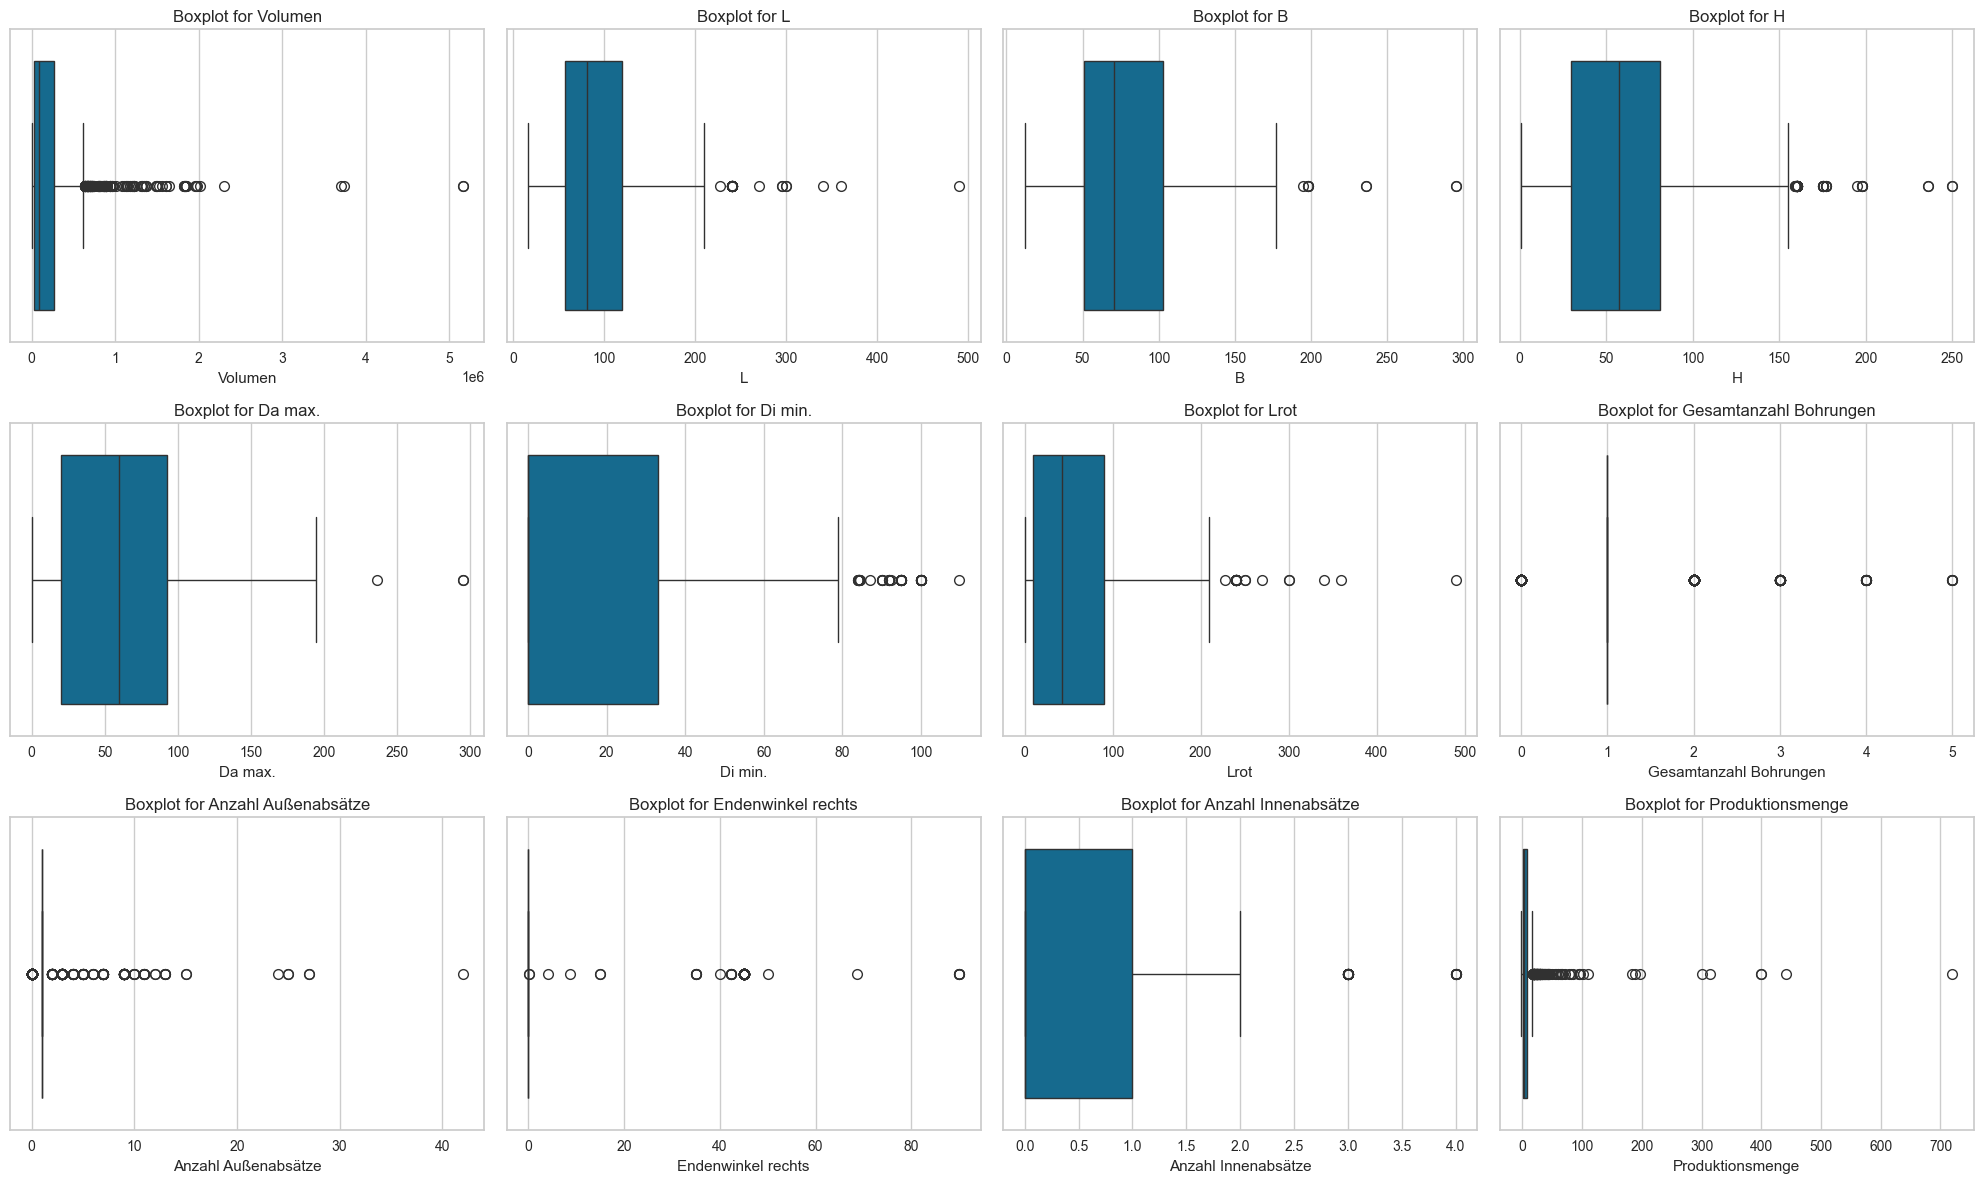

In [67]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

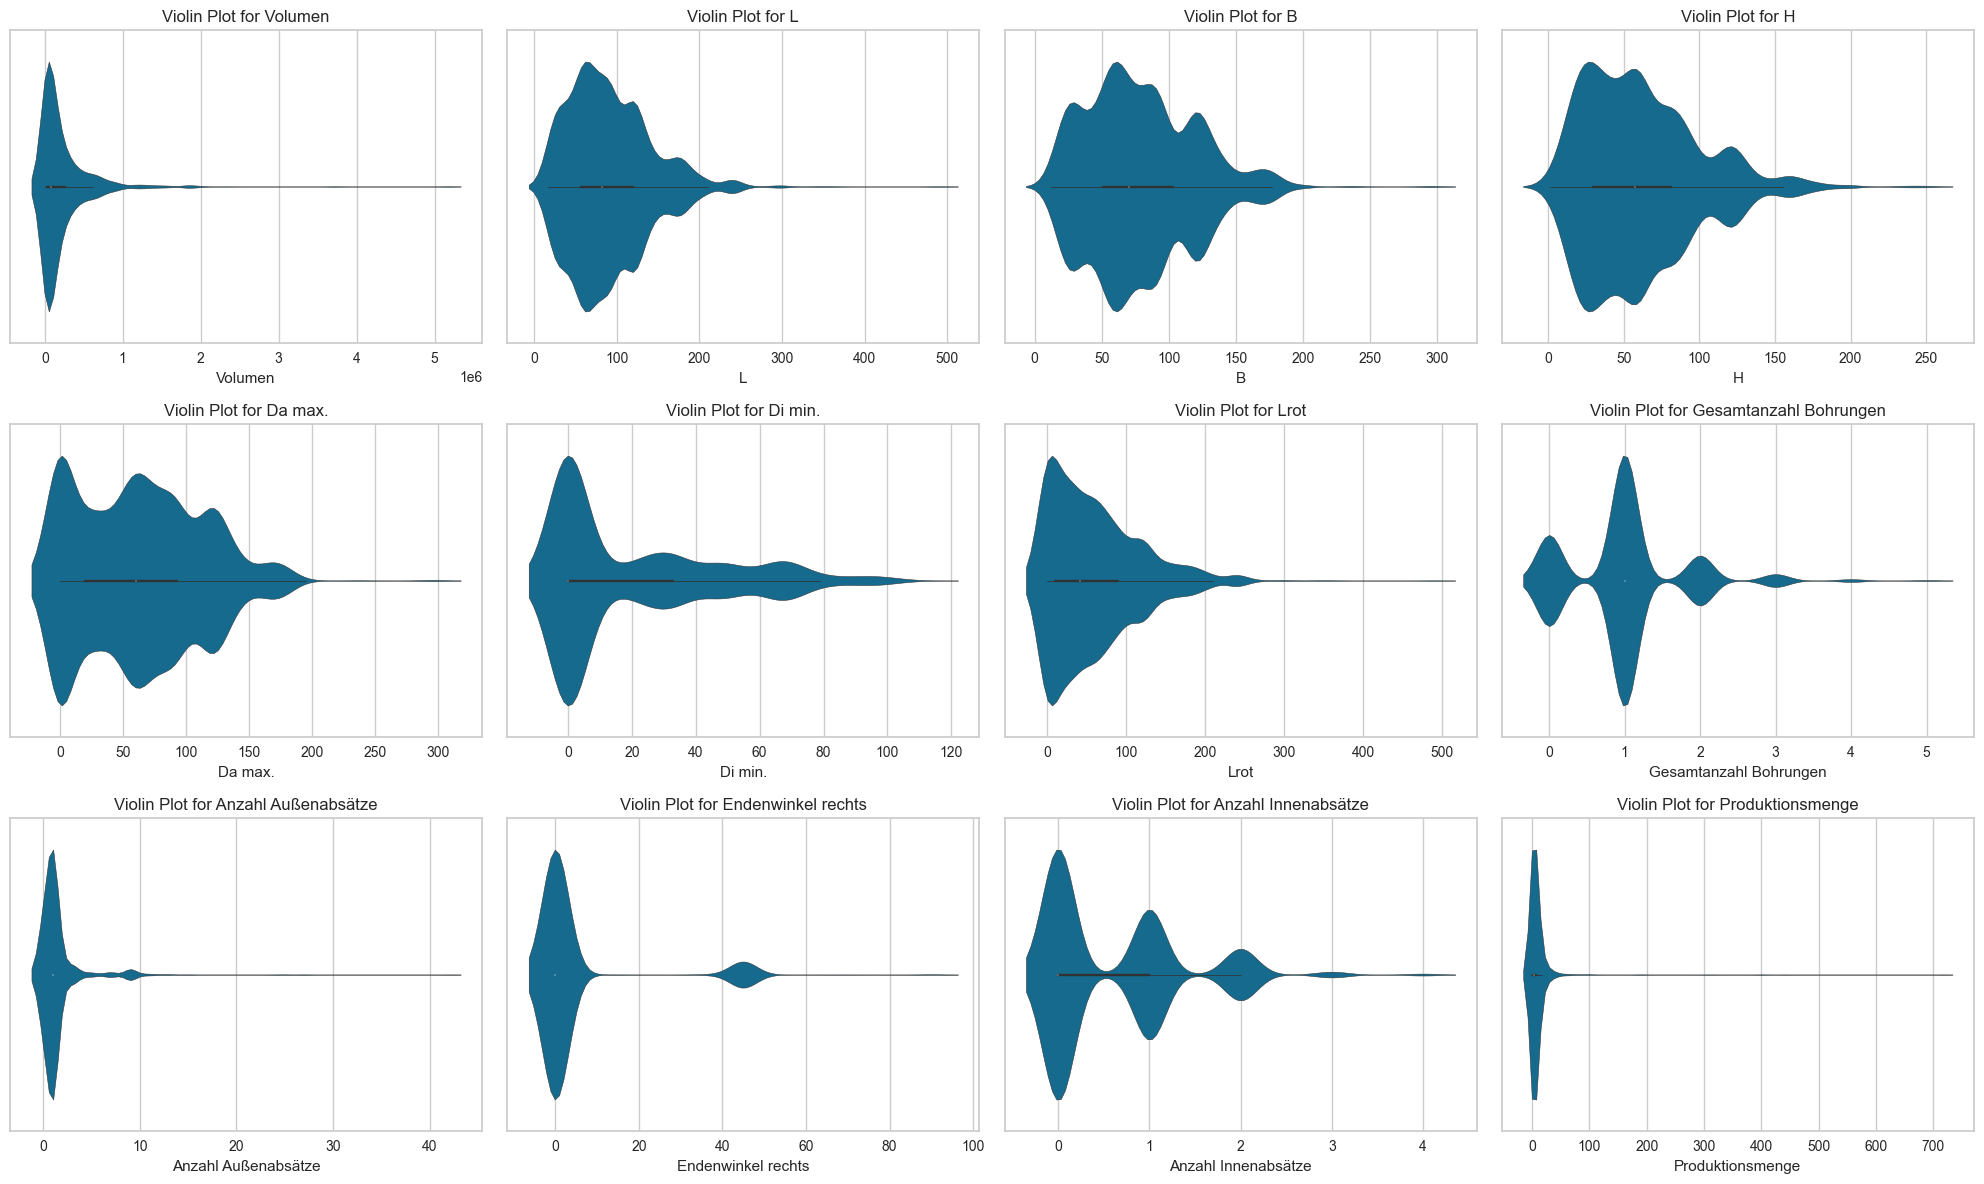

In [68]:
# show violonplot of data
exploration.violinplots(data, num_columns)

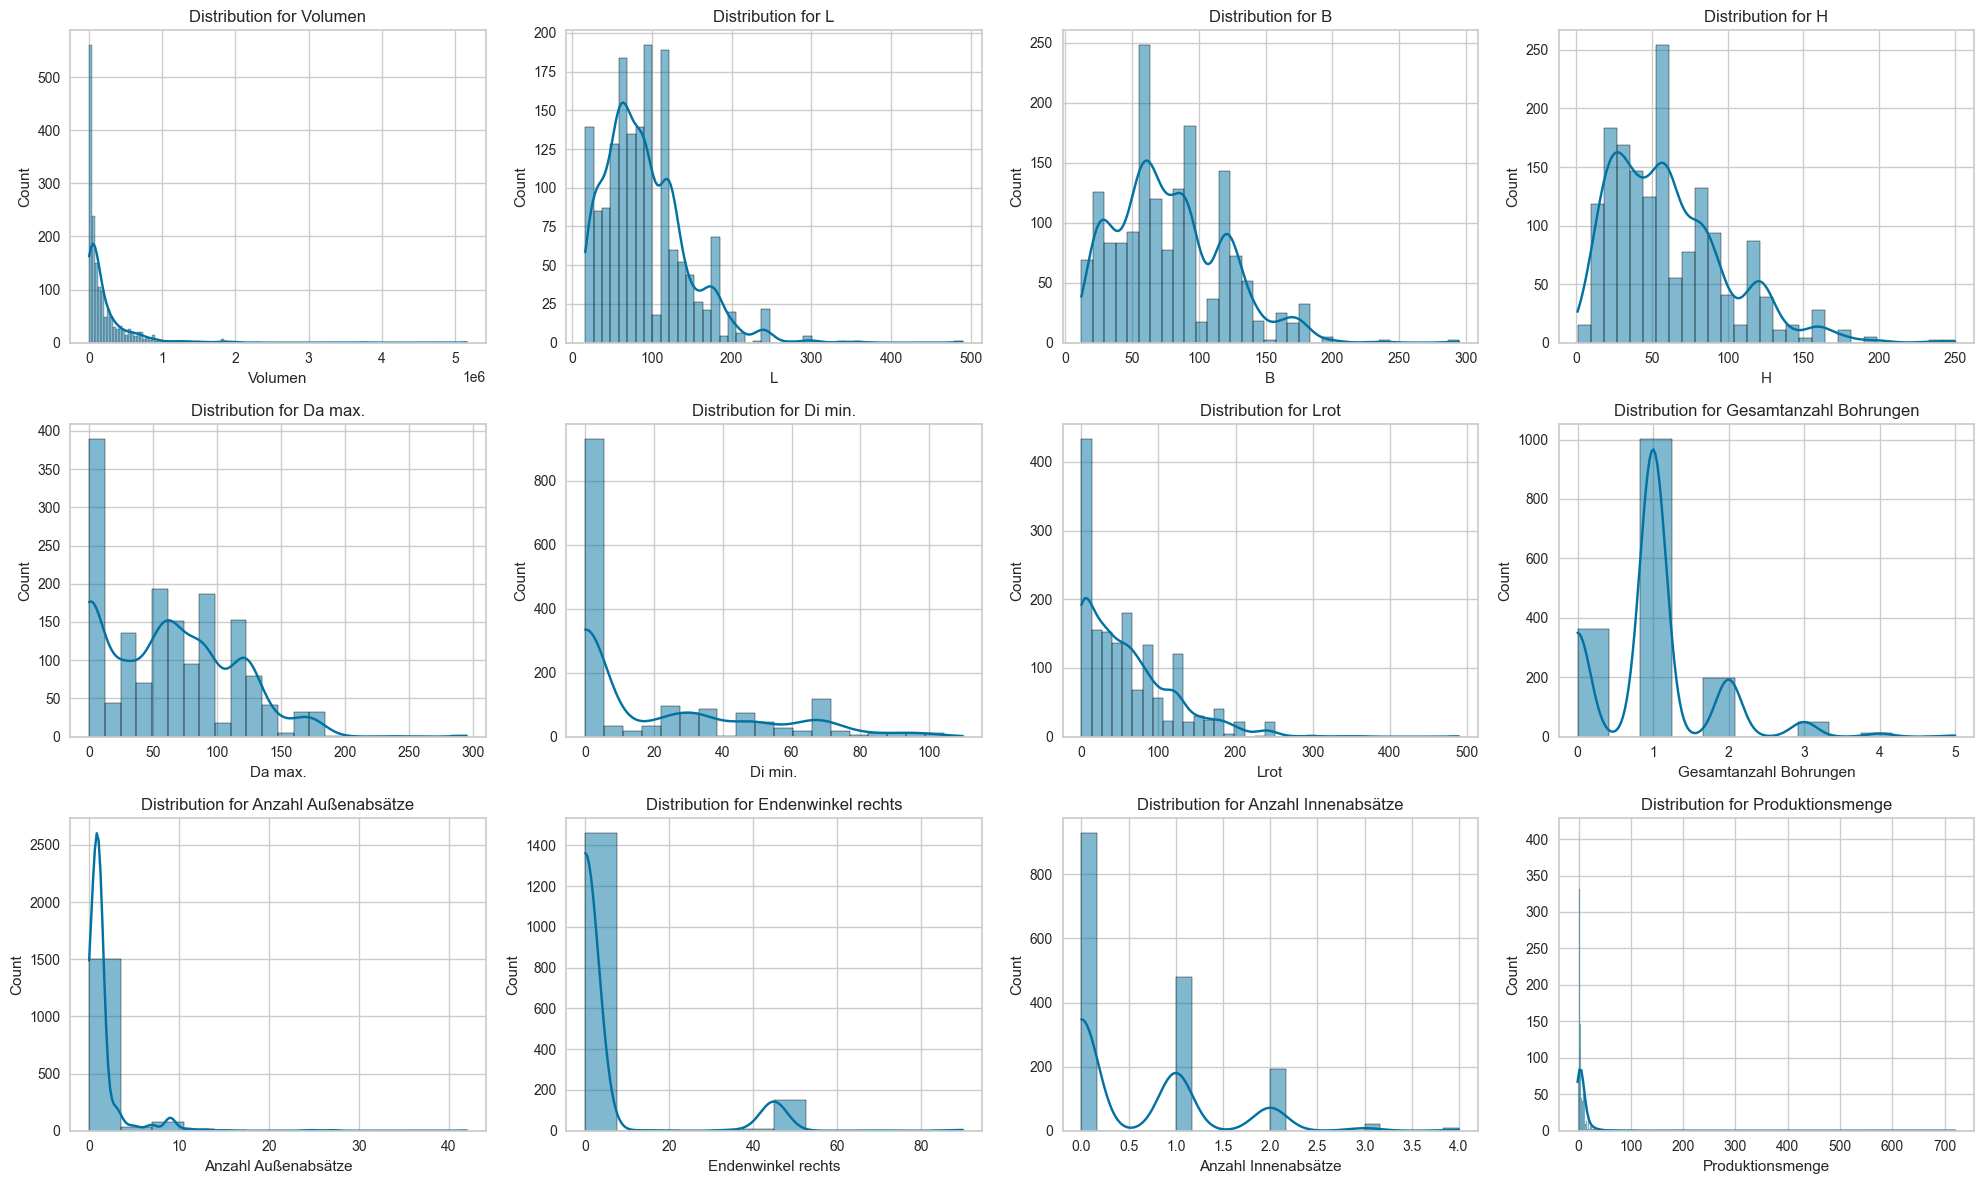

In [69]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [70]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

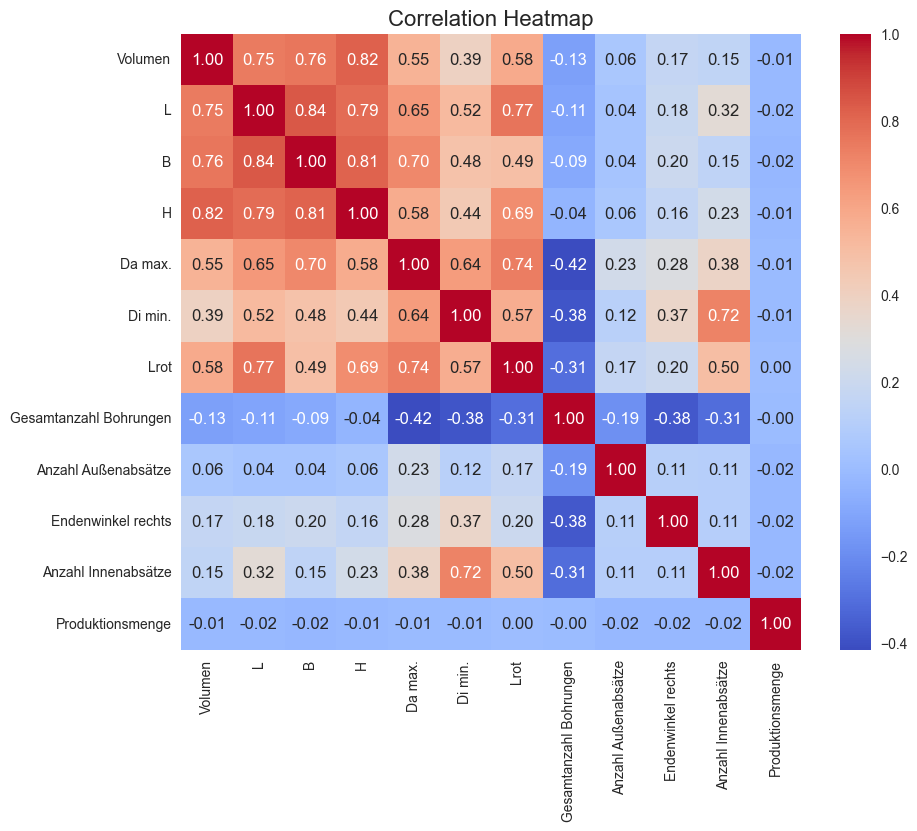

In [71]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [72]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Endenwinkel rechts,...,Basisressource 625000.0,Basisressource 530001.0,Basisressource 601000.0,Basisressource 611000.0,Basisressource 651000.0,Basisressource 651001.0,Basisressource 653000.0,Basisressource 655000.0,Basisressource 655001.0,Produktionsmenge
Teil,,,,,,,,,,,,,,,,,,,,,
4040-1526-606-060-12,28481.28,60.0,39.50,37.12,39.5,17.0,60.0,1.0,11.0,0.0,...,0,1,1,1,0,1,1,1,0,6.000000
4060-2521-090-090-FA,71272.94,90.0,60.30,60.30,60.3,24.0,90.0,0.0,1.0,0.0,...,1,0,1,1,1,1,1,1,0,2.000000
4060-2528-030-030-24,23830.12,59.6,56.58,30.00,59.6,0.0,30.0,1.0,11.0,0.0,...,0,0,0,0,0,0,0,0,0,9.272727
4060-1528-030-030-24,23830.12,59.6,56.58,30.00,59.6,0.0,30.0,1.0,11.0,0.0,...,0,0,0,0,0,0,0,0,0,1.000000
4060-2528-030-060-24,44737.57,60.0,59.60,56.58,59.6,0.0,60.0,1.0,27.0,0.0,...,0,0,0,0,0,0,0,0,0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T074-PH26-905-060-34,89412.13,74.0,74.00,60.00,0.0,0.0,0.0,5.0,0.0,0.0,...,0,1,1,1,0,1,1,1,0,3.000000
T074-PH26-905-080-34,120403.83,80.0,74.00,74.00,0.0,0.0,0.0,5.0,0.0,0.0,...,0,1,1,1,0,1,1,1,0,5.806452
T103-PH21-125-125-BW,319954.37,125.0,103.30,103.30,103.3,0.0,125.0,4.0,1.0,0.0,...,1,0,1,1,1,1,1,1,0,0.000000


In [73]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Endenwinkel rechts,...,Basisressource 625000.0,Basisressource 530001.0,Basisressource 601000.0,Basisressource 611000.0,Basisressource 651000.0,Basisressource 651001.0,Basisressource 653000.0,Basisressource 655000.0,Basisressource 655001.0,Produktionsmenge
Teil,,,,,,,,,,,,,,,,,,,,,
4082-7122-060-360-03,655018.19,360.0,81.6,81.6,81.6,40.24,360.0,1.0,1.0,0.0,...,1,0,1,1,1,0,1,1,0,4.00000
4087-1521-120-240-24,493307.71,240.0,86.6,86.6,86.6,46.00,240.0,1.0,1.0,0.0,...,1,0,1,1,1,1,1,1,0,44.00000
4096-1521-060-300-00,834767.72,300.0,95.6,95.6,95.6,51.83,300.0,1.0,1.0,0.0,...,1,0,1,1,1,1,1,1,0,8.00000
4160-7121-096-160-ID,1101894.54,160.0,159.9,159.9,159.9,78.80,160.0,0.0,1.0,0.0,...,1,1,1,1,0,0,1,1,0,2.00000
4160-7121-192-240-ID,1615633.47,240.0,159.9,159.9,159.9,78.80,240.0,0.0,1.0,0.0,...,1,1,1,1,0,0,1,1,0,8.19685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T122-7111-150-300-DQ,1521159.57,300.0,122.1,122.1,122.1,75.00,300.0,0.0,1.0,45.0,...,0,0,0,1,0,0,0,0,0,1.00000
Z139-EB22-228-228-MF,943571.16,227.5,139.1,139.1,139.1,76.00,227.5,1.0,1.0,0.0,...,1,0,1,1,0,0,1,1,0,1.00000
Z139-EB26-405-163-MA,873581.77,162.5,139.1,139.1,139.1,76.00,162.5,1.0,9.0,0.0,...,0,1,1,1,0,0,1,1,0,3.00000


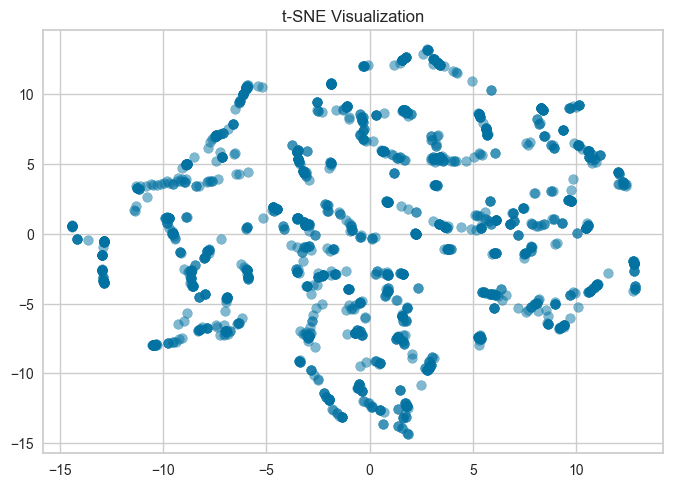

In [74]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Adjustments based on EDA__

In [42]:
# drop columns Lrot, Da max.
data = data.drop(columns=['Lrot', 'Da max.'])
data_preprocessed = data_preprocessed.drop(columns=['Lrot', 'Da max.']) 

In [43]:
# remove columns Lrot, Da max. from num_columns
num_columns = [col for col in num_columns if col not in ['Lrot', 'Da max.']]

__Clustering__

In [ ]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

In [134]:
# # adjust the data types according to num_columns and cat_columns
# for col in num_columns:
#     data[col] = data[col].astype(float)
#     data_preprocessed[col] = data_preprocessed[col].astype(float)
# for col in cat_columns:
#     data[col] = data[col].astype('string')
#     data_preprocessed[col] = data_preprocessed[col].astype('string')

# data_preprocessed[cat_columns]

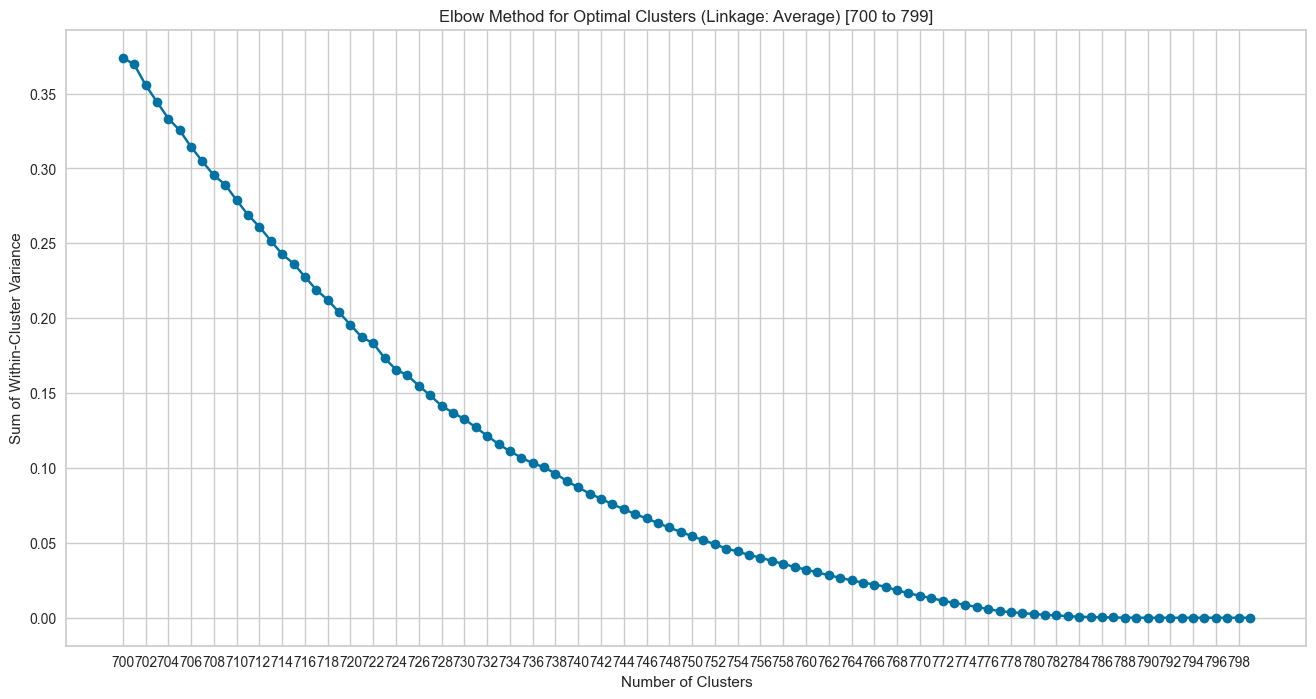

In [143]:
### plot the elbow plot
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 700, 799)

In [144]:
k_list = [532,596,598,778]

In [146]:
df = pd.DataFrame(data={'Teil': data.index})
for k in k_list:
    labels = clustering.agglomerative_clustering(distance_matrix, k)
    df['k=' + str(k)] = labels                  
    df.to_excel('c:/Users/IM-KI/Documents/PrEvelOp_Docs/results_capicard.xlsx', index=False)

In [147]:
# remove rows from link_data wehere value in 'Teil' does not appear as index of data
link_data_2 = link_data[link_data['Teil'].isin(data.index)]
link_data_2

,Teil,Zeichnung
71451,4160-7121-240-240-ID,4160-__21-240-240-ID
73078,8120-1531-180-180-00,8120-__31-180-180-00
73080,8120-1532-180-180-01,8120-__32-180-180-01
76920,G062-0521-060-060-24,G062-__21-060-060-24
76922,G062-0521-060-020-24,G062-__21-060-020-24
...,...,...
159234,P022-7104-001-033-P1,P022-__04-001-033-P1
159357,9058-25XX-XXX-050-HF,9058-__XX-XXX-050-HF
159615,7050-2504-009-013-24,7050-__04-009-013-24
159624,7095-XA52-125-125-KC,7095-__52-125-125-KC


In [148]:
# left join of zeichnungen and link_data on 'Zeichnung'
zeichnungen = pd.merge(zeichnungen, link_data_2, on='Zeichnung', how='left')
zeichnungen

,Zeichnung,Teil
0,3095-1521-128-128-AO,NaN
1,3095-1526-405-044-AO,NaN
2,3095-1526-405-088-AO,NaN
3,3095-1526-604-036-AO,NaN
4,3095-1526-905-044-AO,NaN
...,...,...
2234,Z016-EG26-001-003-OC,NaN
2235,Z016-EG26-001-003-OD,NaN
2236,Z016-EG26-001-006-OA,NaN
2237,Z016-EG26-001-006-OC,NaN


In [149]:
# if a value in 'Teil is not null set it to 1, else set it to 0
zeichnungen['available'] = zeichnungen['Teil'].notnull().astype(int)

In [150]:
zeichnungen

,Zeichnung,Teil,available
0,3095-1521-128-128-AO,NaN,0
1,3095-1526-405-044-AO,NaN,0
2,3095-1526-405-088-AO,NaN,0
3,3095-1526-604-036-AO,NaN,0
4,3095-1526-905-044-AO,NaN,0
...,...,...,...
2234,Z016-EG26-001-003-OC,NaN,0
2235,Z016-EG26-001-003-OD,NaN,0
2236,Z016-EG26-001-006-OA,NaN,0
2237,Z016-EG26-001-006-OC,NaN,0


In [151]:
# export it to a excel file zeichnungen_2
zeichnungen.to_excel('c:/Users/IM-KI/Documents/PrEvelOp_Docs/zeichnungen.xlsx', index=False)

In [ ]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

In [ ]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 300, 500)

In [ ]:
clustering.silhouette_score_kmedoids(data_preprocessed, 300, 500)

__Evaluation__

In [ ]:
labels = clustering.agglomerative_clustering(distance_matrix, 33)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('results/results_roemheld_aggl_66.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [ ]:
labels = clustering.kmedoids_clustering(distance_matrix, 50)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('results/results_roemheld_kmedoids_50.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)